In [5]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [6]:
pd.set_option('max_colwidth', 800)

data_read = pd.read_csv('67401711.csv')

In [7]:
data_read.head(2)

,Unnamed: 0,author_id,created_at,id,text
0,0,601856885,2021-04-27T18:01:08.000Z,1387104539648667649,"@MercantilBanco buenas tardes, que debo hacer para poder aumentar el límite de mis TDC ?"
1,1,49336014,2021-04-27T18:00:24.000Z,1387104354910539778,@MercantilBanco requiero hacer un pago electrónico para una sucesión. La plataforma del banco permite imprimir ese pago? Es seguro?


In [8]:
analyzer = SentimentIntensityAnalyzer()

In [16]:
diccionario_analisis = {'neg':[], 'neu':[], 'pos' : [], 'compound' : []}

for indice_fila, fila in data_read.iterrows():
    analisis = analyzer.polarity_scores(fila.text)
    diccionario_analisis['neg'].append(analisis['neg'])
    diccionario_analisis['neu'].append(analisis['neu'])
    diccionario_analisis['pos'].append(analisis['pos'])
    diccionario_analisis['compound'].append(analisis['compound'])

HTTPError: HTTP Error 429: Too Many Requests

In [18]:
len(diccionario_analisis['neg'])

107

In [19]:
resultados = data_read.copy()
resultados = resultados[0:len(diccionario_analisis['neg'])]

for i in diccionario_analisis.keys():
    resultados[i] = diccionario_analisis[i]

In [22]:
resultados

,Unnamed: 0,author_id,created_at,id,text,neg,neu,pos,compound
0,0,601856885,2021-04-27T18:01:08.000Z,1387104539648667649,"@MercantilBanco buenas tardes, que debo hacer para poder aumentar el límite de mis TDC ?",0.000,0.658,0.342,0.6369
1,1,49336014,2021-04-27T18:00:24.000Z,1387104354910539778,@MercantilBanco requiero hacer un pago electrónico para una sucesión. La plataforma del banco permite imprimir ese pago? Es seguro?,0.000,0.810,0.190,0.6322
2,2,1387101068853714950,2021-04-27T17:52:39.000Z,1387102405041524742,@MercantilBanco estoy afiliado a t pago no puedo hacer pago movil en la pagina de inter y en mi telefono no veo los contactos que hago,0.000,1.000,0.000,0.0000
3,3,32323041,2021-04-27T17:34:08.000Z,1387097747665391617,"@MercantilBanco buenas tardes. Estoy tratando de recargar saldo a un celular Movistar desde mi cuenta mercantil, pero me dice que no pueden procesar mi operación, que lo intente más tarde. Tienen algún problema con Movistar? Que puedo hacer? Me urge recargar el saldo.",0.077,0.885,0.038,-0.4515
4,4,76481335,2021-04-27T17:10:12.000Z,1387091723269115904,@libilis1 @MercantilBanco Ni a mi,0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...,...,...,...
102,2,76132491,2021-04-23T03:55:16.000Z,1385442118689333250,"Lo certifico, hice 3 horas de cola en la sede Principal del @MercantilBanco, desde las 9.30am hasta las 12.44 que pude sacar. 👇👇👇 https://t.co/of1W3fQT2k",0.000,1.000,0.000,0.0000
103,3,135051727,2021-04-23T02:51:23.000Z,1385426044669284352,@MercantilBanco quisiera saber cómo puedo aumentar mis límites en tarjetas de crédito,0.000,0.598,0.402,0.7506
104,4,3015929447,2021-04-23T00:02:52.000Z,1385383633591181314,@chavezeresloma1 @CarnetDLaPatria @NicolasMaduro Igual a mi! Transferí el 13 abril de @CarnetDLaPatria bono y hoy 22 aún no está acreditado en @MercantilBanco A quien podemos reclamar presidente @NicolasMaduro ?,0.000,1.000,0.000,0.0000
105,5,64231313,2021-04-22T23:07:27.000Z,1385369691208785922,@MercantilBanco Buenas Noches! Hay algún horario para afiliarse a TPago? Es que no logramos entrar en la parte de afiliación. Gracias,0.000,0.685,0.315,0.8070


<AxesSubplot:>

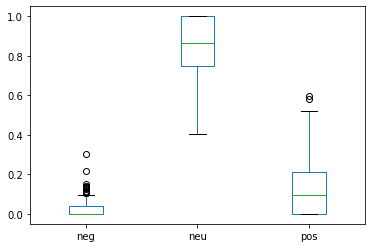

In [21]:
resultados[['neg','neu','pos']].plot(kind='box') #la amplia mayoría son neutros

<AxesSubplot:>

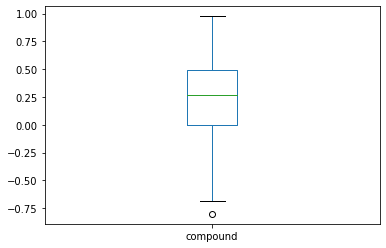

In [85]:
resultados['compound'].plot(kind='box') #el compound no nos da tanta información

<AxesSubplot:xlabel='pos'>

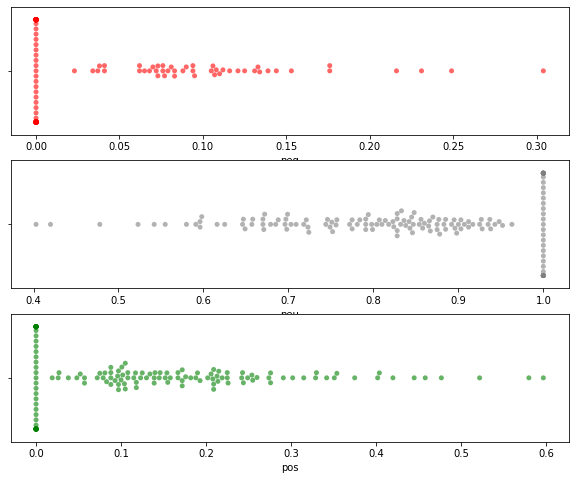

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows = 3, ncols = 1, figsize = (10,8))

sns.swarmplot(resultados.neg , ax = ax[0], color = 'red', alpha = 0.6)
sns.swarmplot(resultados.neu , ax = ax[1], color = 'grey', alpha = 0.6)
sns.swarmplot(resultados.pos , ax = ax[2], color = 'green', alpha = 0.6)

In [112]:
resultados

,Unnamed: 0,author_id,created_at,id,text,neg,neu,pos,compound
0,0,601856885,2021-04-27T18:01:08.000Z,1387104539648667649,"@MercantilBanco buenas tardes, que debo hacer ...",0.000,0.658,0.342,0.6369
1,1,49336014,2021-04-27T18:00:24.000Z,1387104354910539778,@MercantilBanco requiero hacer un pago electró...,0.000,0.810,0.190,0.6322
2,2,1387101068853714950,2021-04-27T17:52:39.000Z,1387102405041524742,@MercantilBanco estoy afiliado a t pago no pue...,0.000,1.000,0.000,0.0000
3,3,32323041,2021-04-27T17:34:08.000Z,1387097747665391617,@MercantilBanco buenas tardes. Estoy tratando ...,0.077,0.885,0.038,-0.4515
4,4,76481335,2021-04-27T17:10:12.000Z,1387091723269115904,@libilis1 @MercantilBanco Ni a mi,0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...,...,...,...
144,44,836716219,2021-04-21T15:28:55.000Z,1384891908481224706,@MercantilBanco Necesito ayuda... no he podido...,0.072,0.752,0.176,0.4898
145,45,138139167,2021-04-21T15:23:34.000Z,1384890561296048131,@MercantilBanco saludos deberían revisar esa o...,0.094,0.657,0.249,0.5106
146,46,108459559,2021-04-21T15:20:04.000Z,1384889679871369217,@MercantilBanco como pueden ayudar?tengo una s...,0.000,0.870,0.130,0.4019
147,47,107767934,2021-04-21T15:14:04.000Z,1384888171490517001,@MercantilBanco el vencimiento de la clave tel...,0.000,0.917,0.083,0.2716


In [121]:
tags = ['neg' , 'neu', 'pos']

In [127]:
resultados[tags]

,neg,neu,pos
0,0.000,0.658,0.342
1,0.000,0.810,0.190
2,0.000,1.000,0.000
3,0.077,0.885,0.038
4,0.000,1.000,0.000
...,...,...,...
144,0.072,0.752,0.176
145,0.094,0.657,0.249
146,0.000,0.870,0.130
147,0.000,0.917,0.083


In [166]:
resultados['score'] = resultados[tags].idxmax(axis=1)

In [167]:
resultados

,Unnamed: 0,author_id,created_at,id,text,neg,neu,pos,compound,score
0,0,601856885,2021-04-27T18:01:08.000Z,1387104539648667649,"@MercantilBanco buenas tardes, que debo hacer para poder aumentar el límite de mis TDC ?",0.000,0.658,0.342,0.6369,neu
1,1,49336014,2021-04-27T18:00:24.000Z,1387104354910539778,@MercantilBanco requiero hacer un pago electrónico para una sucesión. La plataforma del banco permite imprimir ese pago? Es seguro?,0.000,0.810,0.190,0.6322,neu
2,2,1387101068853714950,2021-04-27T17:52:39.000Z,1387102405041524742,@MercantilBanco estoy afiliado a t pago no puedo hacer pago movil en la pagina de inter y en mi telefono no veo los contactos que hago,0.000,1.000,0.000,0.0000,neu
3,3,32323041,2021-04-27T17:34:08.000Z,1387097747665391617,"@MercantilBanco buenas tardes. Estoy tratando de recargar saldo a un celular Movistar desde mi cuenta mercantil, pero me dice que no pueden procesar mi operación, que lo intente más tarde. Tienen algún problema con Movistar? Que puedo hacer? Me urge recargar el saldo.",0.077,0.885,0.038,-0.4515,neu
4,4,76481335,2021-04-27T17:10:12.000Z,1387091723269115904,@libilis1 @MercantilBanco Ni a mi,0.000,1.000,0.000,0.0000,neu
...,...,...,...,...,...,...,...,...,...,...
144,44,836716219,2021-04-21T15:28:55.000Z,1384891908481224706,@MercantilBanco Necesito ayuda... no he podido hacer un pago móvil que es urgente!!! No tengo respuesta de su parte...,0.072,0.752,0.176,0.4898,neu
145,45,138139167,2021-04-21T15:23:34.000Z,1384890561296048131,@MercantilBanco saludos deberían revisar esa opción para cancelar me indica no disponible para el pago. gracias,0.094,0.657,0.249,0.5106,neu
146,46,108459559,2021-04-21T15:20:04.000Z,1384889679871369217,@MercantilBanco como pueden ayudar?tengo una semana tratando de actualizar mi clave de internet y entrar al portal,0.000,0.870,0.130,0.4019,neu
147,47,107767934,2021-04-21T15:14:04.000Z,1384888171490517001,"@MercantilBanco el vencimiento de la clave telefónica no friega a uno en el momento más importante, de paso no puede cambiarse desde la app.",0.000,0.917,0.083,0.2716,neu


In [164]:
resultados[tags].idxmax(axis=1).value_counts()

neu    146
pos      3
dtype: int64

---------
---------
------

In [143]:
data_read.text

0      @MercantilBanco buenas tardes, que debo hacer ...
1      @MercantilBanco requiero hacer un pago electró...
2      @MercantilBanco estoy afiliado a t pago no pue...
3      @MercantilBanco buenas tardes. Estoy tratando ...
4                      @libilis1 @MercantilBanco Ni a mi
                             ...                        
795    @MercantilBanco Simplifiquen instrumentos. Uni...
796    @MercantilBanco La app tpago no sirveeeee.! Po...
797    Distinguida junta directiva del @MercantilBanc...
798                  @MercantilBanco Te he intentado kit
799                  @MercantilBanco ..\n\nJoomla que me
Name: text, Length: 800, dtype: object